# Assignment 2 - Unsupervised Learning 
`

In [18]:
! git commit -am "task 2 and 3" 
! git push

[main 70eaf9e] task 2 and 3
 1 file changed, 28 insertions(+), 32 deletions(-)


The file will have its original line endings in your working directory
To https://github.com/Basirulislam/Assignment_2.git
   fbb36af..70eaf9e  main -> main


#### Task 1 (3 points):

1. Data normalization
    - Look at features of Linnerud dataset, tell what is the problem with them
          from sklearn.datasets import load_linnerud
    - Normalize these features using a correct method. Plot original vs normalized probability density.

In [1]:
import pandas as pd

import numpy as np
import mglearn
%matplotlib inline

In [2]:
from sklearn.datasets import load_linnerud

data = load_linnerud()
df_data = pd.DataFrame(data.data, columns=data.feature_names)


# Descriptive statistics of the DataFrame

df_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Chins,20.0,9.45,5.286278,1.0,4.75,11.5,13.25,17.0
Situps,20.0,145.55,62.566575,50.0,101.00,122.5,210.00,251.0
Jumps,20.0,70.30,51.277470,25.0,39.50,54.0,85.25,250.0


Some algorithms are very sensitive to the scaling of data such as SVM and NNs, because they aassume that all features are centered around zero and have variance in the same order. We can see that the features in our dataset have mean values that are positive. The std values vary between the features, so that can cause issues in a model as well. 

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_data)
Dataset_scaled = scaler.transform(df_data)

Dataset_scaled = pd.DataFrame(Dataset_scaled)
Dataset_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,20.0,1.776357e-16,1.025978,-1.640004,-0.912192,0.397871,0.737517,1.465329
1,20.0,-2.164935e-16,1.025978,-1.566847,-0.730539,-0.377978,1.056863,1.729189
2,20.0,3.330669e-17,1.025978,-0.906379,-0.616258,-0.326136,0.299125,3.595503


<AxesSubplot:xlabel='0', ylabel='Count'>

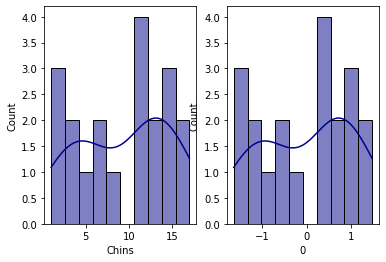

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2)
sns.histplot(df_data['Chins'], kde=True,
             bins=int(10), color = 'darkblue',
              ax=axes[0])
sns.histplot(Dataset_scaled[0], kde=True,
             bins=int(10), color = 'darkblue',
              ax=axes[1])

<AxesSubplot:xlabel='1', ylabel='Count'>

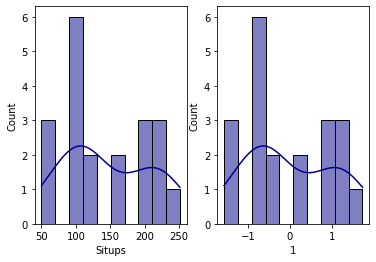

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2)
sns.histplot(df_data['Situps'], kde=True,
             bins=int(10), color = 'darkblue',
              ax=axes[0])
sns.histplot(Dataset_scaled[1], kde=True,
             bins=int(10), color = 'darkblue',
              ax=axes[1])

<AxesSubplot:xlabel='2', ylabel='Count'>

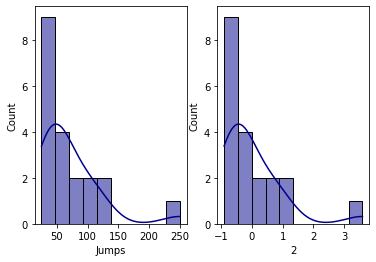

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2)
sns.histplot(df_data['Jumps'], kde=True,
             bins=int(10), color = 'darkblue',
              ax=axes[0])
sns.histplot(Dataset_scaled[2], kde=True,
             bins=int(10), color = 'darkblue',
              ax=axes[1])

As we can see from the histograms above, we managed to scale the data (look at x-axis), without changing the distribution of the features. 

#### Task 2 (4 points):  
2. Dimensionality reduction
    - Load 20 News Dataset
          from sklearn.datasets import fetch_20newsgroups_vectorized
          data = fetch_20newsgroups_vectorized(subset='train')
    - Use KernelPCA for dimensionality reduction. Train a classifier at different nr of dimensions, check how model score changes with dimensions
          Remember that you can load training and testing subsets of data!

In [6]:
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn import datasets
from sklearn.utils import shuffle


bunch_train = datasets.fetch_20newsgroups_vectorized(subset='train',as_frame = True)
bunch_test = datasets.fetch_20newsgroups_vectorized(subset='test',as_frame = True)
y_train = bunch_train.target
y_test = bunch_test.target

In [7]:
# we dont need to scale the data since it's already normalized
X_train = bunch_train.data
X_test = bunch_test.data

In [8]:
# We used 500 components as the last parameter value, which might be slow to run 
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import KernelPCA

n_components = [10,100,500]
col = ['train', 'test', 'accuracy']
score = pd.DataFrame(columns = col, index= n_components)


# fit kPCA model to 20newsgroupsdata
for number in range(0, len(n_components)):
    # keep the first n principal components of the data
    kpca = KernelPCA(n_components=n_components[number])

    kpca.fit(X_train)
    # transform data onto the first n principal components
    X_train_kpca = kpca.transform(X_train)
    X_test_kpca = kpca.transform(X_test)

    logr_news = LogisticRegression(solver='sag').fit(X_train_kpca, y_train)
    # Calculate scores for both test / train samples
    score.at[n_components[number],'train'] = round(logr_news.score(X_train_kpca,y_train),3)
    score.at[n_components[number],'test'] = round(logr_news.score(X_test_kpca,y_test),3)
    score.at[n_components[number],'accuracy'] = round(accuracy_score(y_test, logr_news.predict(X_test_kpca)),3)
print(score)

     train   test
10    0.21   0.19
100  0.607   0.51
500  0.816  0.679


We can see that with higher dimensionality the scores are also higher. There is a positive relationship between n_components and the scores of the classification model

In [9]:
# Implement LDA as comparison to kPCA which is suggested as a good model for topic extraction
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html?fbclid=IwAR1aLSB9D7cp1vr82BIKor0_Okvmm4JrEprIKFNHHjm89EFdgrlW582KzCM#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.metrics import accuracy_score

n_components = [10,100,500]
col = ['train', 'test','accuracy']
score = pd.DataFrame(columns = col, index= n_components)


# fit LDA model to 20newsgroupsdata
for number in range(0, len(n_components)):
    # keep the first n principal components of the data
    lda = LDA(n_components=n_components[number])

    lda.fit(X_train)
    # transform data onto the first n principal components
    X_train_lda = lda.transform(X_train)
    X_test_lda = lda.transform(X_test)

    logr_news = LogisticRegression(solver='sag').fit(X_train_lda, y_train)
    # Calculate scores for both test / train samples
    score.at[n_components[number],'train'] = round(logr_news.score(X_train_lda, y_train),3)
    score.at[n_components[number],'test'] = round(logr_news.score(X_test_lda, y_test),3)
    score.at[n_components[number],'accuracy'] = round(accuracy_score(y_test, logr_news.predict(X_test_lda)),3)
print(score)

     train   test accuracy
10   0.085  0.069    0.069
100  0.157  0.115    0.115
500  0.381   0.33     0.33


As we can see from the results, even though the LDA model is suggested to be a good model for topic extraction, after running a multiclass logistic regression the scores are worse compared to scores received from kPCA. 


#### Task 3 (8 points):

3. Clustering
    - Cluster 20 News Dataset into 20 clusters. Print true class vs cluster distribution. 
          Did you manage to recover the original clusters?  (give students an example plot)

20 News Groups dataset

In [10]:
from sklearn.datasets import fetch_20newsgroups_vectorized
data = fetch_20newsgroups_vectorized(subset='train', remove=('headers','footers','quotes')) # remove some information that might not provide useful information
X = data['data']
Y = data['target']

Printing classes and their predictions

In [11]:
from sklearn.cluster import KMeans, MiniBatchKMeans


kmeans = KMeans(n_clusters=20)
clusters = kmeans.fit_predict(X)

res = list(zip(*np.unique(clusters, return_counts=True)))
res

[(0, 516),
 (1, 985),
 (2, 879),
 (3, 622),
 (4, 814),
 (5, 672),
 (6, 255),
 (7, 121),
 (8, 363),
 (9, 328),
 (10, 683),
 (11, 809),
 (12, 429),
 (13, 597),
 (14, 350),
 (15, 413),
 (16, 539),
 (17, 1155),
 (18, 269),
 (19, 515)]

<AxesSubplot:>

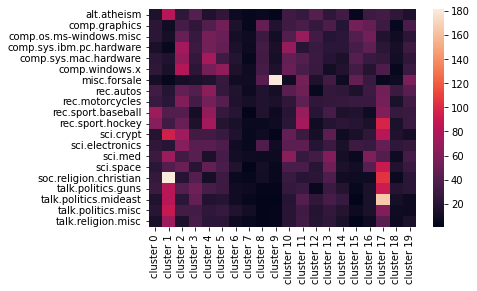

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(Y, clusters)
sn.heatmap(cm, yticklabels=data['target_names'], 
           xticklabels=["cluster {}".format(i) for i in range(20)])

The KMeans with 20 clusters for the 20newsgroups dataset in the above run, managed to distinguish the forsale, religion.christian and politics.mideast groups. That being said, we can see that there is a lot of noise in the clusters (True Negatives). 

In [13]:
kmeans = MiniBatchKMeans(n_clusters=20, n_init=300)
clusters = kmeans.fit_predict(X)

res = list(zip(*np.unique(clusters, return_counts=True)))
res

[(0, 1),
 (1, 1705),
 (2, 2700),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 2378),
 (9, 1),
 (10, 1035),
 (11, 1126),
 (12, 1),
 (13, 1),
 (14, 2356),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1)]

<AxesSubplot:>

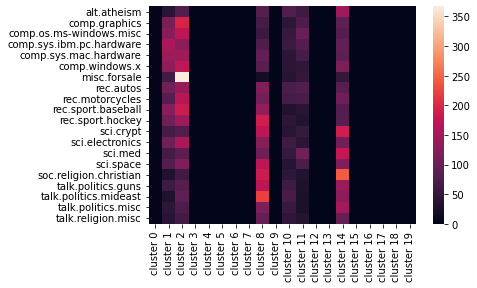

In [14]:
cm = confusion_matrix(Y, clusters)
sn.heatmap(cm, yticklabels=data['target_names'], 
           xticklabels=["cluster {}".format(i) for i in range(20)])

When we run the same problem with MiniBatchKMeans and 300 initializations, we can see on the one hand that some of the clusters that are created only have one text file alocated to them, which means that they are not very useful. On the other hand there are 4-5 clusters created that have much more information about various topics. 

In [15]:
kmeans = MiniBatchKMeans(n_clusters=20, n_init=200)
clusters = kmeans.fit_predict(X_train_lda)

res = list(zip(*np.unique(clusters, return_counts=True)))
res

[(0, 481),
 (1, 13),
 (2, 944),
 (3, 532),
 (4, 804),
 (5, 776),
 (6, 1110),
 (7, 281),
 (8, 961),
 (9, 169),
 (10, 586),
 (11, 513),
 (12, 994),
 (13, 568),
 (14, 207),
 (15, 450),
 (16, 49),
 (17, 783),
 (18, 199),
 (19, 894)]

<AxesSubplot:>

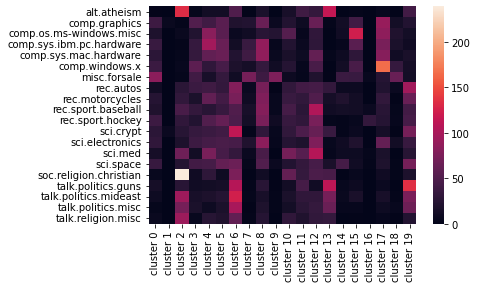

In [16]:
cm = confusion_matrix(Y, clusters)
sn.heatmap(cm, yticklabels=data['target_names'], 
           xticklabels=["cluster {}".format(i) for i in range(20)])

Lastly, we run MinBatchKmeans with 200 initializations with the data that was first transformed with the LDA model. Even though we saw that it was not a great dimensionality reduction tool compared to PCA, we have some intreresting results when the transformed variables are passed through the MinBatchKmeans model. In conclusion, we did not manage to receive the original clusters of our dataset. Perhaps KMeans is not the right clustering model for this problem.   